In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df=pd.read_csv("./DATASET/train.csv")
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
df.dropna(subset='Embarked' , inplace=True)

In [29]:
df.drop("Cabin",axis=1,inplace=True)

In [30]:
df['Age'] =df.groupby(['Pclass','Sex','Embarked'])['Age'].transform(lambda x  : x.fillna(x.median()))

In [31]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [32]:
df.drop(['PassengerId','Name','Ticket'] , axis=1 ,inplace=True)

In [33]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,23.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


The hist plot of Survived
Survived
0    549
1    340
Name: count, dtype: int64


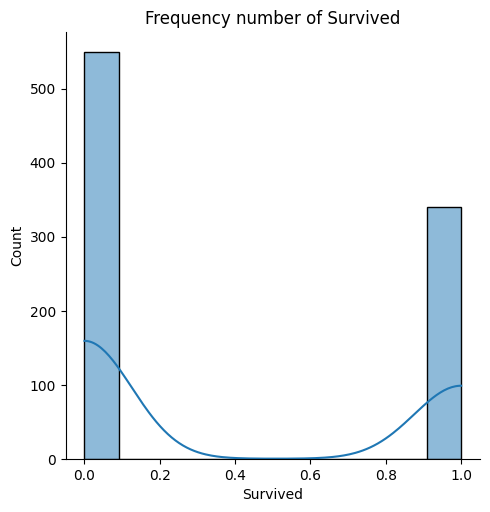

The hist plot of Pclass
Pclass
3    491
1    214
2    184
Name: count, dtype: int64


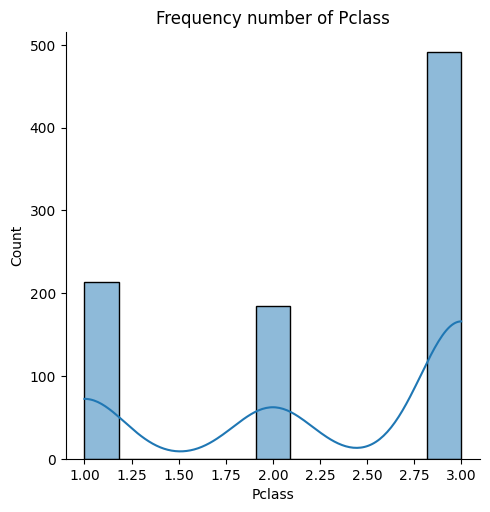

The hist plot of Age
Age
25.00    74
27.00    43
20.00    38
26.00    36
30.00    33
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 90, dtype: int64


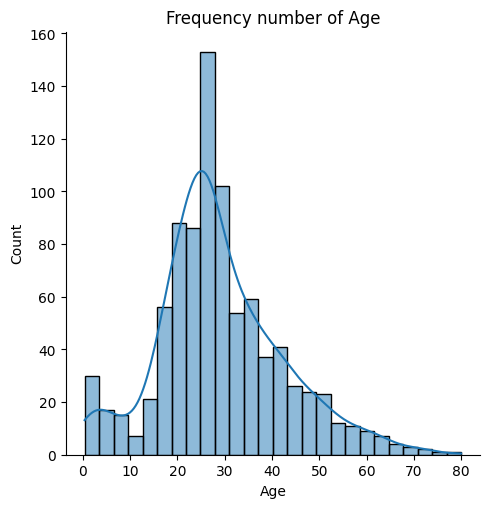

The hist plot of Fare
Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 247, dtype: int64


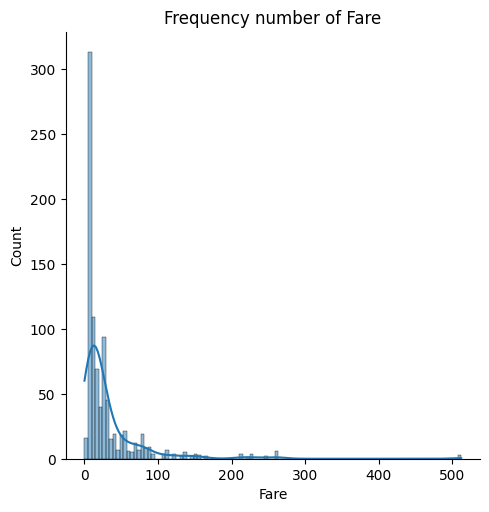

In [34]:
def count_numeric(df,col) : 
    print(f"The hist plot of {col}")
    print(df[col].value_counts())
    sns.displot(df[col] , kde=True)
    plt.title(f"Frequency number of {col}")
    plt.show()
for i in ['Survived', 'Pclass','Age','Fare']:
    count_numeric(df,i)

In [35]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.080900,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.330126,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#########Sex######
count      889
unique       2
top       male
freq       577
Name: Sex, dtype: object


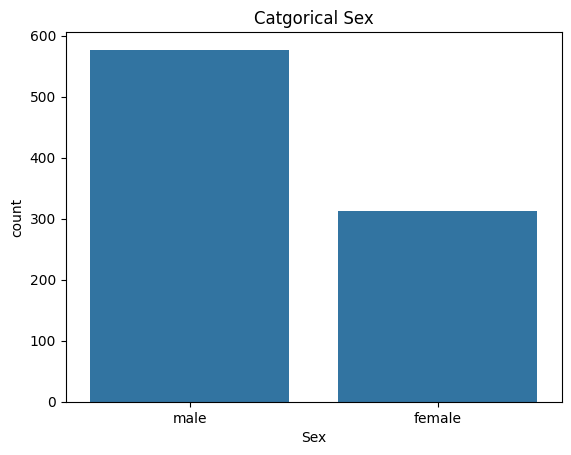

#########Embarked######
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


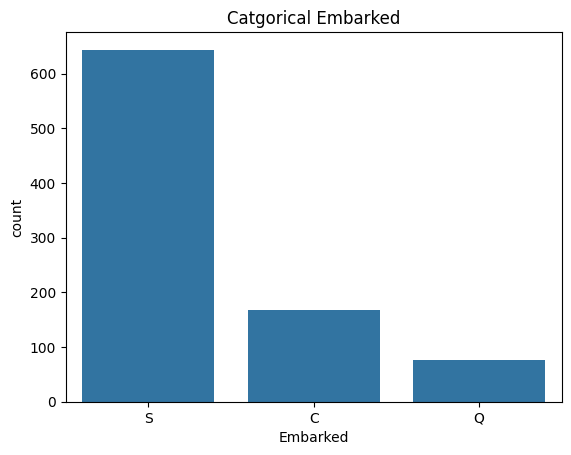

In [36]:
def count_cat(df,col):
    print(f"#########{col}######")
    print(df[col].describe())
    sns.countplot(x=df[col])
    plt.title(f"Catgorical {col}")
    plt.show()

for i in ['Sex','Embarked']:
    count_cat(df,i)

## BiVaritent analysis


##############Pclass#############
Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


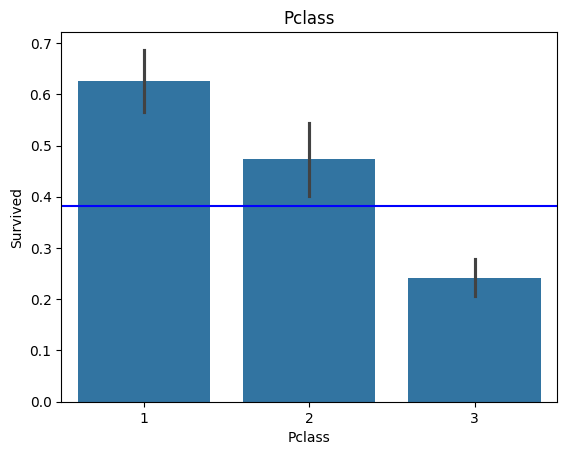

##############Sex#############
Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64


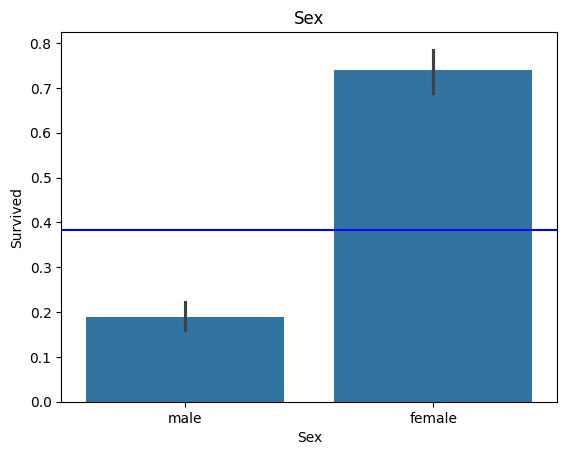

##############SibSp#############
SibSp
0    0.343234
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


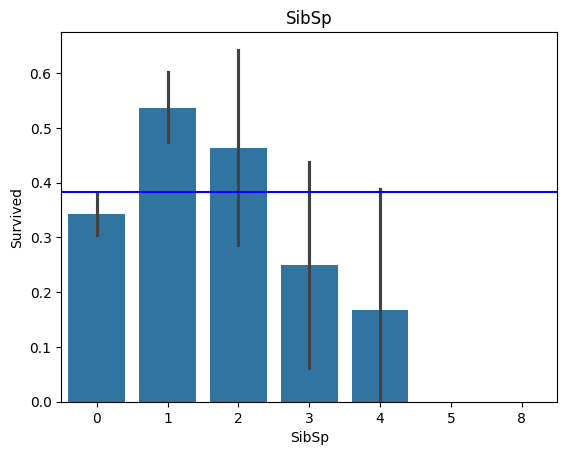

##############Parch#############
Parch
0    0.341716
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


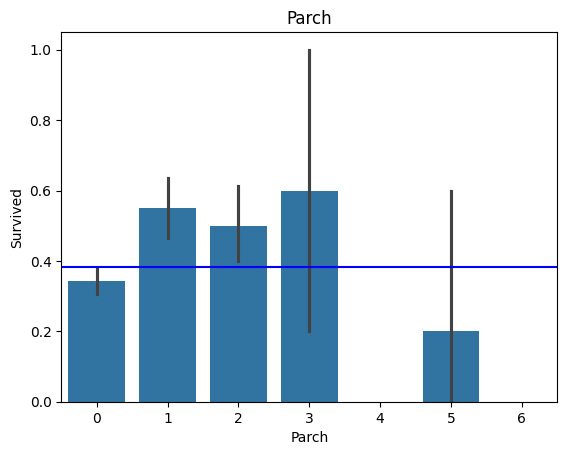

##############Embarked#############
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


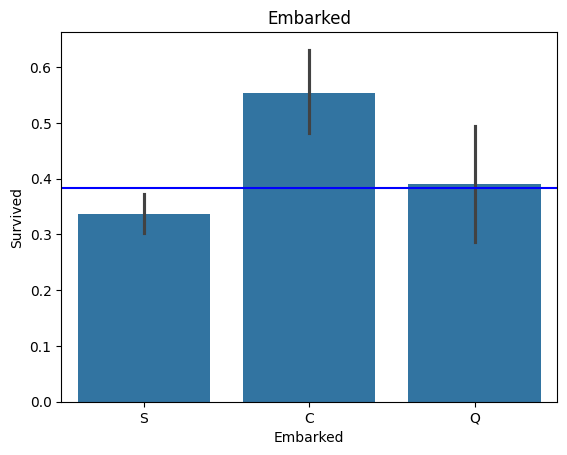

In [37]:
def Mean_Supervised(df,col) : 
    print(f"##############{col}#############")
    print(df.groupby(col).Survived.mean())
    sns.barplot(x=col,y='Survived' ,data=df)
    plt.title(col)
    plt.axhline(df['Survived'].mean() , color='blue')
    plt.show()

for i in [ 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']:
    Mean_Supervised(df,i)

In [38]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

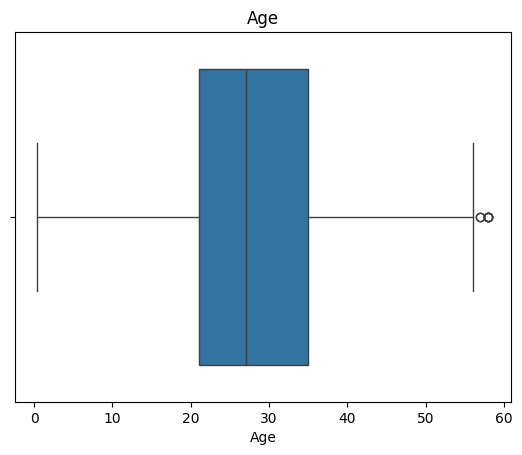

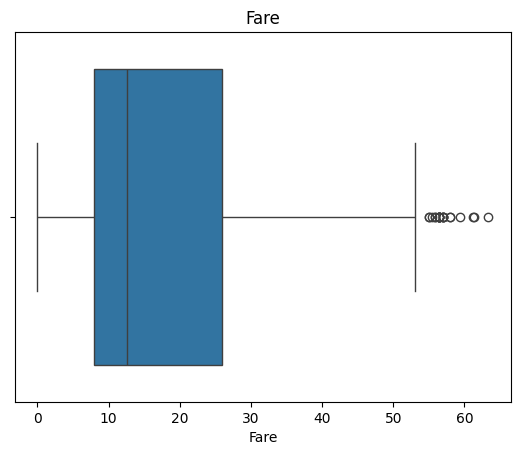

In [39]:
def check_outlier(df,col) :
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    minnumn=q1- (1.5 * IQR)
    maxumim=q3 + (1.5 * IQR)
    return df[(df[col]>= minnumn) & (df[col] <= maxumim)]
for i in ["Age","Fare"]:
    df=check_outlier(df,i)
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

# def remove_outliers(df, col):
#     while True:
#         q1 = df[col].quantile(0.25)
#         q3 = df[col].quantile(0.75)
#         IQR = q3 - q1
#         minnumn = q1 - 1.5 * IQR
#         maxumim = q3 + 1.5 * IQR
#         new_df = df[(df[col] >= minnumn) & (df[col] <= maxumim)]
#         if len(new_df) == len(df):  # no more outliers
#             break
#         df = new_df
#     return df

# df = remove_outliers(df, "Fare")
# sns.boxplot(x=df["Fare"])
# plt.title("Fare (Outliers Removed)")
# plt.show()


In [40]:
df=df[df['Fare']<52]

In [41]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,27.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,23.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


<Axes: xlabel='Fare'>

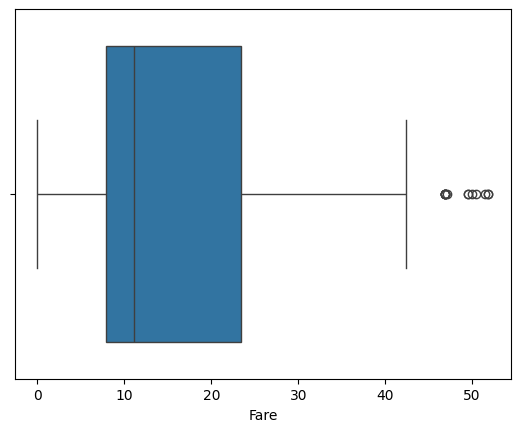

In [42]:
sns.boxplot(x=df['Fare'])

In [43]:
df['Family Size'] = df['SibSp'] + df['Parch']

Family Size
0    0.27
1    0.43
2    0.57
3    0.70
4    0.08
5    0.06
6    0.33
7    0.00
Name: Survived, dtype: float64


<Axes: xlabel='Family Size', ylabel='Survived'>

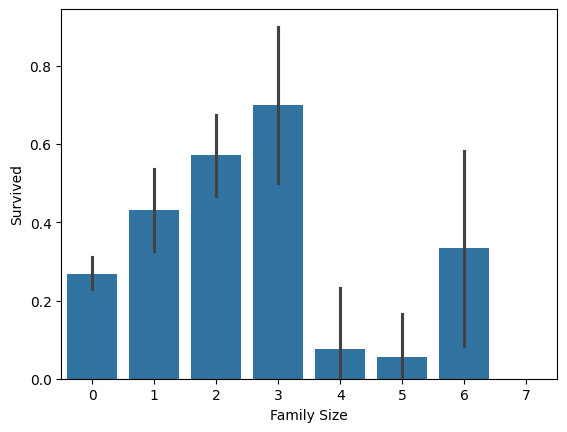

In [44]:
print(round(df.groupby('Family Size').Survived.mean()  , 2) )
sns.barplot(x=df['Family Size'] ,y=df['Survived'])

In [45]:
df['Alone']=df['Family Size']==0


Alone
False    0.44
True     0.27
Name: Survived, dtype: float64


<Axes: xlabel='Alone', ylabel='Survived'>

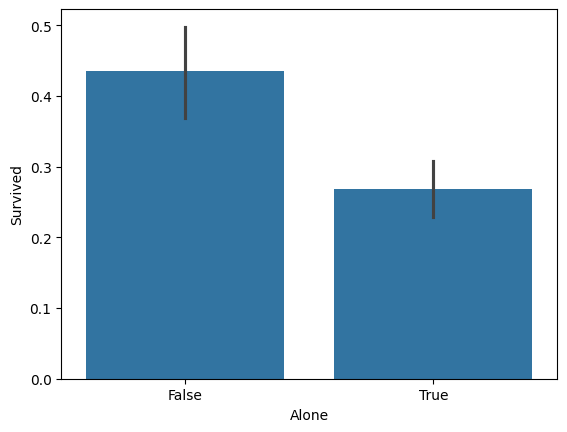

In [46]:
print( round(df.groupby('Alone').Survived.mean() , 2  ))

sns.barplot(x=df['Alone'],y=df['Survived'])

In [47]:
print(round(df.groupby('Family Size').Survived.mean().sort_values().nlargest(3)  , 2) )


Family Size
3    0.70
2    0.57
1    0.43
Name: Survived, dtype: float64


SibSp
0    520
1    137
2     21
4     18
3     13
5      5
Name: count, dtype: int64


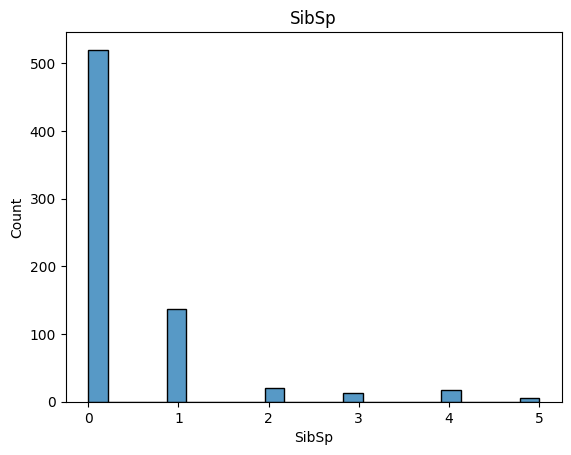

Parch
0    560
1     88
2     52
5      5
3      5
4      3
6      1
Name: count, dtype: int64


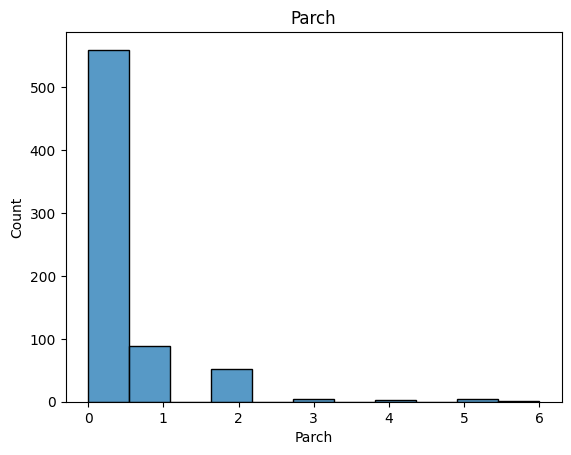

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     32
26.0000    30
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 183, dtype: int64


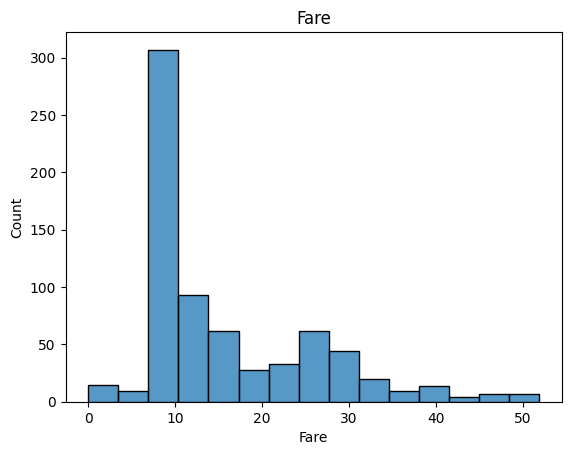

Pclass
3    471
2    172
1     71
Name: count, dtype: int64


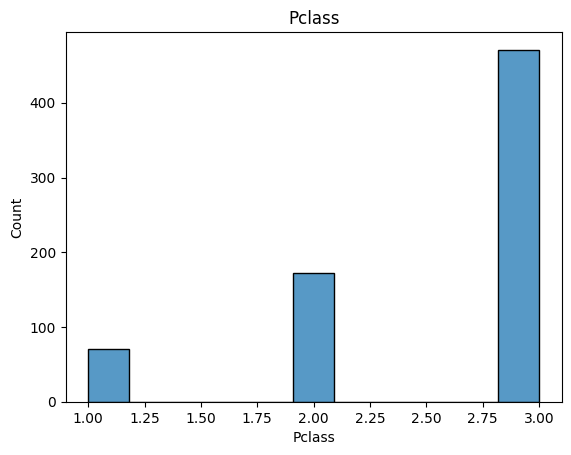

Survived
0    482
1    232
Name: count, dtype: int64


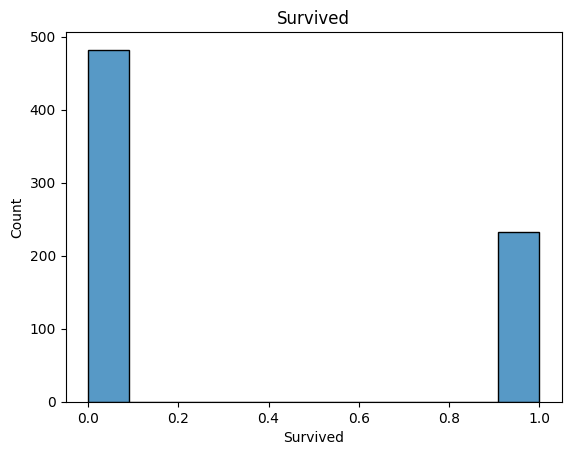

Family Size
0    473
1     95
2     77
3     20
5     18
4     13
6     12
7      6
Name: count, dtype: int64


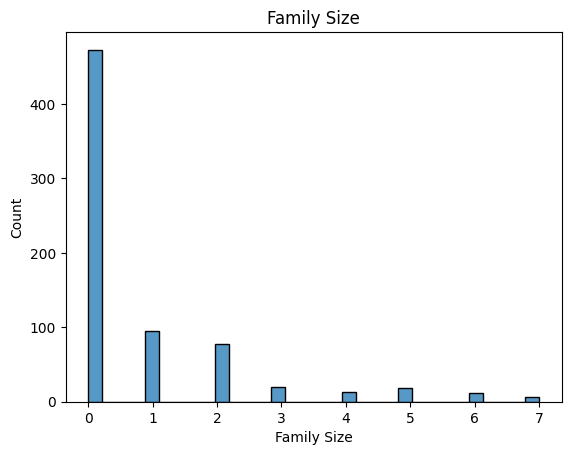

Alone
True     473
False    241
Name: count, dtype: int64


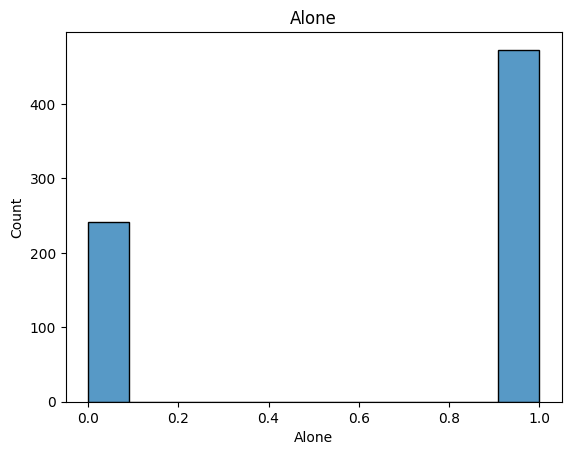

In [48]:
def numeric_hist(df,col) : 
    print(df[col].value_counts())
    sns.histplot(df[col] )
    plt.title(f"{col}")
    # plt.axhline(df['Survived'].mean(),color='red',)
    plt.show()

for item in ['SibSp','Parch','Fare','Pclass','Survived','Family Size','Alone']:
    numeric_hist(df,item)